In [65]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

## Exercise 3.3

$$
n_c = 32,\;\bar{y}_c = 1.013,\;s_c = 0.24
$$
$$
n_t = 36,\;\bar{y}_t = 1.173,\;s_t = 0.20
$$

##### (a)
According to the Gaussian model with unknown mean and variance (with uniform prior on $\mu$, $\log \sigma^2$)
$$
p(\mu_c|y) = t_{n_c-1}(\bar{y}_c, \frac{s_c^2}{n}) = t_{31}(1.013, 0.0018)
$$
$$
p(\mu_t|y) = t_{n_c-1}(\bar{y}_t, \frac{s_t^2}{n}) = t_{35}(1.173, 0.0011)
$$

##### (b)

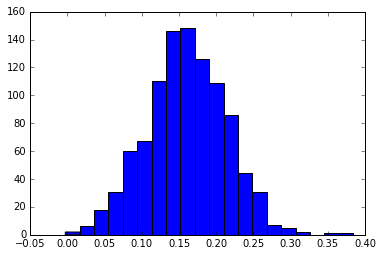

In [66]:
mu_c = np.random.standard_t(31, size=1000) * (0.24 / 32**0.5) + 1.013
mu_t = np.random.standard_t(35, size=1000) * (0.2 / 36**0.5) + 1.173
samples = mu_t - mu_c
_ = plt.hist(samples, bins=20)

In [67]:
samples.sort()
n = samples.shape[0]
print 'Approximate 95% posterior interval:', [samples[int(0.025*n)], samples[int(0.975*n)]]

Approximate 95% posterior interval: [0.054761480604240242, 0.26171725375286792]


## Exercise 3.4

$$
n_0 = 674,\;y_0 = 39
$$
$$
n_1 = 680,\;y_1 = 22
$$

##### (a)
The likelihood is binomial:
$$
p(y|p) \propto p^y(1 - p)^{n - y}
$$
We can put an uniform prior
$$
p(p) \propto 1
$$
Then the posterior is Beta:
$$
p(p|y) \propto p(p)p(y|p) = p^y(1 - p)^{n - y} \propto Beta(y + 1, n - y + 1)
$$

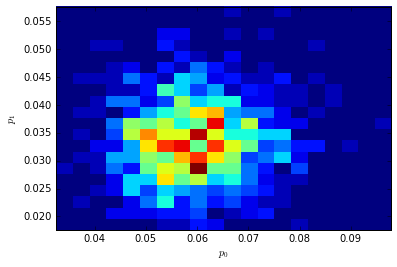

In [68]:
p0_samples = np.random.beta(39 + 1, 674 - 39 + 1, size=1000)
p1_samples = np.random.beta(22 + 1, 680 - 22 + 1, size=1000)
_ = plt.hist2d(p0_samples, p1_samples, bins=20)
_ = plt.xlabel('$p_0$')
_ = plt.ylabel('$p_1$')

##### (b)

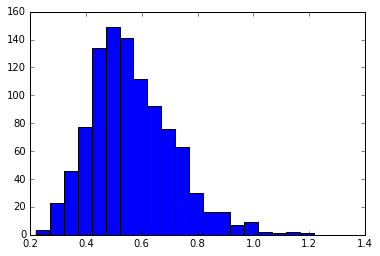

In [69]:
odds_ratio = (p1_samples / (1 - p1_samples)) / (p0_samples / (1 - p0_samples))
_ = plt.hist(odds_ratio, bins=20)

In [70]:
odds_ratio.sort()
n = odds_ratio.shape[0]
print 'Posterior mean:', odds_ratio.mean()
print 'Approximate 95% posterior interval:', [odds_ratio[int(0.025*n)], odds_ratio[int(0.975*n)]]

Posterior mean: 0.56321756494
Approximate 95% posterior interval: [0.32079529096825454, 0.90958108919138903]


##### (c)
If we change to Beta prior
$$
p(p) = Beta(a, a)
$$
Then the posterior is:
$$
p(p|y) \propto p(p)p(y|p) = p^{a - 1}(1 - p)^{a - 1}p^y(1 - p)^{n - y} \propto Beta(a + y, a + n - y)
$$
* When $a = 1$, it's the same prior as we choose in (a).
* When $a = \frac{1}{2}$, it's the Jeffery's noninformative prior.

It can be seen that when n is large enough, the value of $a$ doesn't change the posterior distribution very much.

## Exercise 3.7

In the first model
$$
\begin{aligned}
p(b) &= \frac{\theta_b^b}{b!}e^{-\theta_b} \\
p(v) &= \frac{\theta_v^v}{v!}e^{-\theta_v} \\
p(b|v+b) &= \frac{p(v+b|b)p(b)}{p(v+b)} \\
&= \frac{p(v)p(b)}{p(v+b)} \\
&= \frac{\frac{\theta_b^b}{b!}e^{-\theta_b}\cdot \frac{\theta_v^v}{v!}e^{-\theta_v}}{\frac{(\theta_v + \theta_b)^{b+v}}{(b+v)!}e^{-(\theta_b + \theta_v)}} \\
&= {b+v \choose b}\left(\frac{\theta_b}{\theta_b+\theta_v}\right)^b\left(1 - \frac{\theta_b}{\theta_b+\theta_v}\right)^v \\
&= B(b|b+v, p)
\end{aligned}
$$
In the second model
$$
p(b|v+b) = B(b|b+v, p)
$$

## Exercise 3.9

$$
\begin{aligned}
\mu, \sigma^2 &\sim \text{N-Inv-}\chi^2(\mu_0, \sigma_0^2/\kappa_0; v_0, \sigma_0^2) \\
y_{1:n} &\sim \mathcal{N}(\mu, \sigma^2)
\end{aligned}
$$
The posterior:
$$
\begin{aligned}
p(\mu, \sigma^2) &\propto p(\mu, \sigma^2)\prod_{i=1}^n p(y_i|\mu, \sigma^2) \\
&= \sigma^{-1}(\sigma^2)^{-v_0/2 + 1}\exp\left(-\frac{1}{2\sigma^2}[v_0\sigma_0^2 + \kappa_0(\mu - \mu_0)^2\right)\cdot (\sigma^2)^{-n/2}\exp\left(-\frac{1}{2\sigma^2}[(n-1)s^2 + n(\bar{y} - \mu)^2]\right) \\
&= \sigma^{-1}(\sigma^2)^{-(v_0 + n)/2 + 1}\exp\left(-\frac{1}{2\sigma^2}[v_0\sigma_0^2 + (n-1)s^2 + \kappa_0(\mu - \mu_0)^2 + n(\bar{y} - \mu)^2]\right) \\
&= \sigma^{-1}(\sigma^2)^{-(v_0 + n)/2 + 1}\exp\left(-\frac{1}{2\sigma^2}[(\kappa_0 + n)\mu^2 - 2(\kappa_0\mu_0 + n\bar{y})\mu + \kappa_0\mu_0^2 + n\bar{y}^2 + v_0\sigma_0^2 + (n-1)s^2]\right) \\
&= \sigma^{-1}(\sigma^2)^{-(v_0 + n)/2 + 1}\exp\left(-\frac{1}{2\sigma^2}[(\kappa_0 + n)(\mu - \frac{\kappa_0\mu_0 + n\bar{y}}{\kappa_0 + n})^2 + \frac{n\kappa_0}{\kappa_0 + n}(\mu_0 - \bar{y})^2 + v_0\sigma_0^2 + (n-1)s^2]\right) \\
&\propto \text{N-Inv-}\chi^2(\mu_n, \sigma_n^2/\kappa_n; v_n, \sigma_n^2)
\end{aligned}
$$
where
$$
\begin{aligned}
\mu_n &= \frac{\kappa_0\mu_0 + n\bar{y}}{\kappa_0 + n} \\
\kappa_n &= \kappa_0 + n \\
v_n &= v_0 + n \\
v_n\sigma_n^2 &= \frac{n\kappa_0}{\kappa_0 + n}(\mu_0 - \bar{y})^2 + v_0\sigma_0^2 + (n-1)s^2
\end{aligned}
$$

## Exercise 3.11

##### (a)

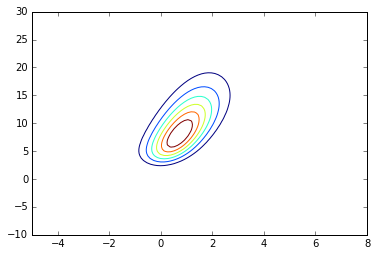

In [71]:
x = np.array([-0.86, -0.3, -0.05, 0.73])
n = np.array([5, 5, 5, 5])
y = np.array([0, 1, 3, 5])
mu = np.array([0, 10])
sigma = np.array([[4, 10], [10, 100]])

def joint(ab, normal_prior=True):
    alpha = ab[:, 0]
    beta = ab[:, 1]
    theta = 1./(1. + np.exp(-(alpha.reshape((1, -1)) + \
                              beta.reshape((1, -1))*x.reshape((-1, 1)))))
    likelihood = theta**y.reshape((-1, 1)) * (1. - theta)**(n - y).reshape((-1, 1))
    joint = np.prod(likelihood, axis=0)
    if normal_prior:
        joint = stats.multivariate_normal.pdf(ab, mu, sigma)*joint
    return joint

def plot_isocontours(func, xlimits=[1, 6], ylimits=[-4, 8],
                     numticks=1000, colors=None):
    xi = np.linspace(*xlimits, num=numticks)
    yi = np.linspace(*ylimits, num=numticks)
    X, Y = np.meshgrid(xi, yi)
    zs = func(np.concatenate([np.atleast_2d(X.ravel()),
                              np.atleast_2d(Y.ravel())]).T)
    Z = zs.reshape(X.shape)
    plt.contour(X, Y, Z, colors=colors)

plot_isocontours(joint, [-5, 8], [-10, 30], 100)

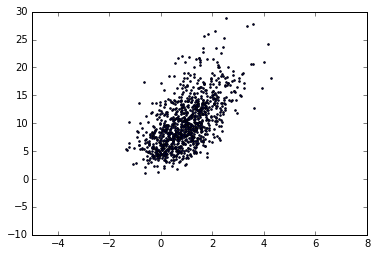

In [72]:
xi = np.arange(-5, 8, 0.1)
yi = np.arange(-10, 30, 0.1)
X, Y = np.meshgrid(xi, yi)
zs = joint(np.concatenate([np.atleast_2d(X.ravel()),
                           np.atleast_2d(Y.ravel())]).T)
Z = zs.reshape(X.shape)
Z = Z / (Z.sum() * 0.1**2)
alphaZ = Z.sum(axis=0)
alphaZ = alphaZ / alphaZ.sum()
alphas = np.random.choice(xi, size=1000, p=alphaZ)
alpha_ind = ((alphas + 5.) / 0.1).astype('int')
betas = np.array([np.random.choice(yi, p=(Z[:, ind] / Z[:, ind].sum())) for ind in alpha_ind])
alphas = np.random.uniform(-0.05, 0.05, size=1000) + alphas
betas = np.random.uniform(-0.05, 0.05, size=1000) + betas
plt.scatter(alphas, betas, s=10, marker='.')
plt.xlim([-5, 8])
_ = plt.ylim([-10, 30])

##### (b)

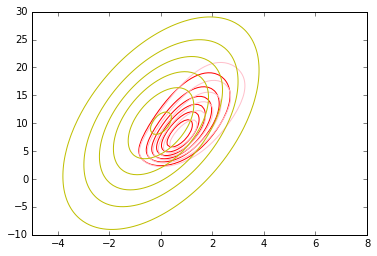

In [73]:
plot_isocontours(joint, [-5, 8], [-10, 30], 100, colors='r')
plot_isocontours(lambda x: joint(x, False), [-5, 8], [-10, 30], 100, colors='pink')
plot_isocontours(lambda x: stats.multivariate_normal.pdf(x, mu, sigma),
                 [-5, 8], [-10, 30], 100, colors='y')

We can see that the red joint is a compromise of the yellow prior and pink data likelihoods.

##### (c)
The prior doesn't change the posterior mode much but reduces the uncertainty in the positive area.

## Exercise 4.1

#### (a)
$$
p(y_i|\theta) \propto \frac{1}{1 + (y_i - \theta)^2}
$$
$$
\begin{aligned}
p(\theta|y) &\propto p(\theta)\prod_{i=1}^5p(y_i|\theta) \\
&= \prod_{i=1}^5 \frac{1}{1 + (y_i - \theta)^2}
\end{aligned}
$$
$$
\log p(\theta|y) = c - \sum_{i=1}^5\log[1 + (y_i - \theta)^2]
$$
$$
\frac{\partial\log p(\theta|y)}{\partial\theta} = \sum_{i=1}^5 \frac{2(y_i - \theta)}{1 + (y_i - \theta)^2}
$$
$$
\frac{\partial^2\log p(\theta|y)}{\partial \theta^2} = \sum_{i=1}^5 \frac{2(y_i - \theta)^2 - 2}{[1 + (y_i-\theta)^2]^2}
$$

#### (b)

In [74]:
from scipy import optimize
y = np.array([-2, -1, 0, 1.5, 2.5])
def first_derivative(theta):
    return np.sum(2*(y - theta) / (1 + (y - theta)**2))
ret = optimize.root(first_derivative, 0.)
print 'Mode of theta:', ret['x'][0]

Mode of theta: -0.137649277989


#### (c)

In [77]:
theta = ret['x'][0]
second_deriv = np.sum((2*(y - theta)**2 - 2) / (1 + (y - theta)**2)**2)
sigma = 1.0 / np.sqrt(-second_deriv)
print 'Normal approximation: N(%s, %s)' % (theta, sigma**2)

Normal approximation: N(-0.137649277989, 0.727330913208)


## Exercise 4.2

$$
\log p(y|\alpha, \beta, n, x) = \sum_{i=1}^n y_i(\alpha + \beta x_i) - n_i\log[1 + e^{\alpha + \beta x_i}]
$$
$$
\frac{\partial\log p(y|\alpha,\beta,n,x)}{\partial\alpha} = \sum_{i=1}^n \left[-n_i \frac{e^{\alpha+\beta x_i}}{1 + e^{\alpha + \beta x_i}} + y_i\right]
$$
$$
\frac{\partial\log p(y|\alpha,\beta,n,x)}{\partial\beta} = \sum_{i=1}^n \left[-n_i \frac{x_ie^{\alpha + \beta x_i}}{1 + e^{\alpha + \beta x_i}} + y_ix_i\right]
$$
$$
\frac{\partial^2\log p(y|\dots)}{\partial \alpha^2} = \sum_{i=1}^n -n_i\frac{e^{\alpha + \beta x_i}}{(1 + e^{\alpha + \beta x_i})^2}
$$
$$
\frac{\partial^2\log p(y|\dots)}{\partial \alpha\beta} = \sum_{i=1}^n -n_ix_i\frac{e^{\alpha + \beta x_i}}{(1 + e^{\alpha + \beta x_i})^2}
$$
$$
\frac{\partial^2\log p(y|\dots)}{\partial \beta^2} = \sum_{i=1}^n -n_ix_i^2\frac{e^{\alpha + \beta x_i}}{(1 + e^{\alpha + \beta x_i})^2}
$$
So the information matrix is
$$
I(\hat{\theta}) = -\begin{pmatrix}
\frac{\partial^2\log p(y|\dots)}{\partial \alpha^2} & \frac{\partial^2\log p(y|\dots)}{\partial \alpha\beta}\\
\frac{\partial^2\log p(y|\dots)}{\partial \alpha\beta} & \frac{\partial^2\log p(y|\dots)}{\partial \beta^2}
\end{pmatrix}
$$
Variance of Normal
$$
\Sigma = I(\hat{\theta})^{-1}
$$